In [4]:
# automatically reload dependant notebooks
%load_ext autoreload
%autoreload 2
import import_ipynb

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Tests of Maximum Flow Algorithms

This notebook contains tests for the maximum flow algorithms implemented in the [`flow.ipynb`](./flow.ipynb) notebook.

## test Edmonds-Karp maximum flow

Let us test `mfEdmondsKarp()` against the flow network shown in Figure 24.6 p.687. First we construct the graph.

Edmonds-Karp
  s None 
    [v1,v2]
  v1 None 
    [v3]
  v2 None 
    [v1,v4]
  v3 None 
    [v2,t]
  v4 None 
    [v3,t]
  t None 
    []
  s-v1: 0.0/16.0
  s-v2: 0.0/13.0
  v1-v3: 0.0/12.0
  v2-v1: 0.0/4.0
  v2-v4: 0.0/14.0
  v3-v2: 0.0/9.0
  v3-t: 0.0/20.0
  v4-v3: 0.0/7.0
  v4-t: 0.0/4.0


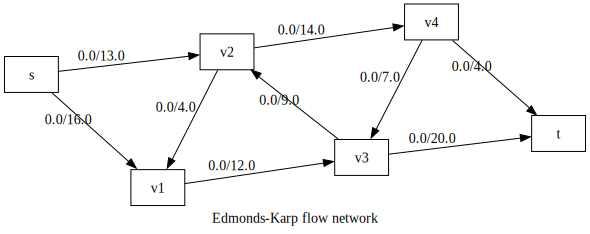

In [5]:
from graph import *
from flow import *

def makeFN() -> FlowGraph:
  vt = ["s", "v1", "v2", "v3", "v4", "t"]
  et = [  # directed edges
    "s-v1", "s-v2",
    "v1-v3",
    "v2-v1", "v2-v4",
    "v3-v2", "v3-t",
    "v4-v3", "v4-t", ]
  ec = {
    "s-v1": 16, "s-v2": 13,
    "v1-v3": 12,
    "v2-v1": 4, "v2-v4": 14,
    "v3-v2": 9, "v3-t": 20,
    "v4-v3": 7, "v4-t": 4, }
  fn = FlowGraph("Edmonds-Karp")
  fn.makeVEc(vt, et, ec)
  return fn

fn = makeFN()
print(fn)
draw(fn, directed=True, label=f"{fn.tag} flow network")

Then, we apply `mfEdmondsKarp()` to the graph to find the maximum flow.

Edmonds-Karp➨
  s None 0
    [v1,v2]
  v1 ^s 1
    [v3]
  v2 ^s 1
    [v1,v4]
  v3 None 
    [v2,t]
  v4 ^v2 2
    [v3,t]
  t None 
    []
  s-v1: 12.0/16.0
  s-v2: 11.0/13.0
  v1-v3: 12.0/12.0
  v2-v1: 0.0/4.0
  v2-v4: 11.0/14.0
  v3-v2: 0.0/9.0
  v3-t: 19.0/20.0
  v4-v3: 7.0/7.0
  v4-t: 4.0/4.0


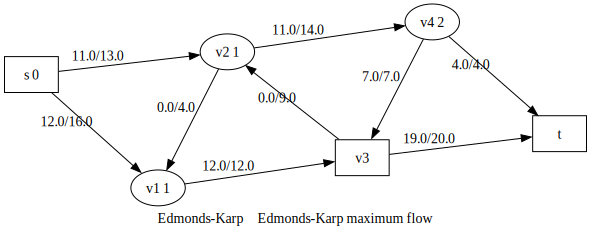

In [6]:
ekmf = mfEdmondsKarp(fn, fn.getV("s"), fn.getV("t"))
print(ekmf)
draw(ekmf, directed=True, label=f"{ekmf.tag} Edmonds-Karp maximum flow")